## Data Collection and Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load The Dataset

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


The datatype for the dataset.csv: 8 numerical / 10 categorial

#### Get the info for the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [5]:
data.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


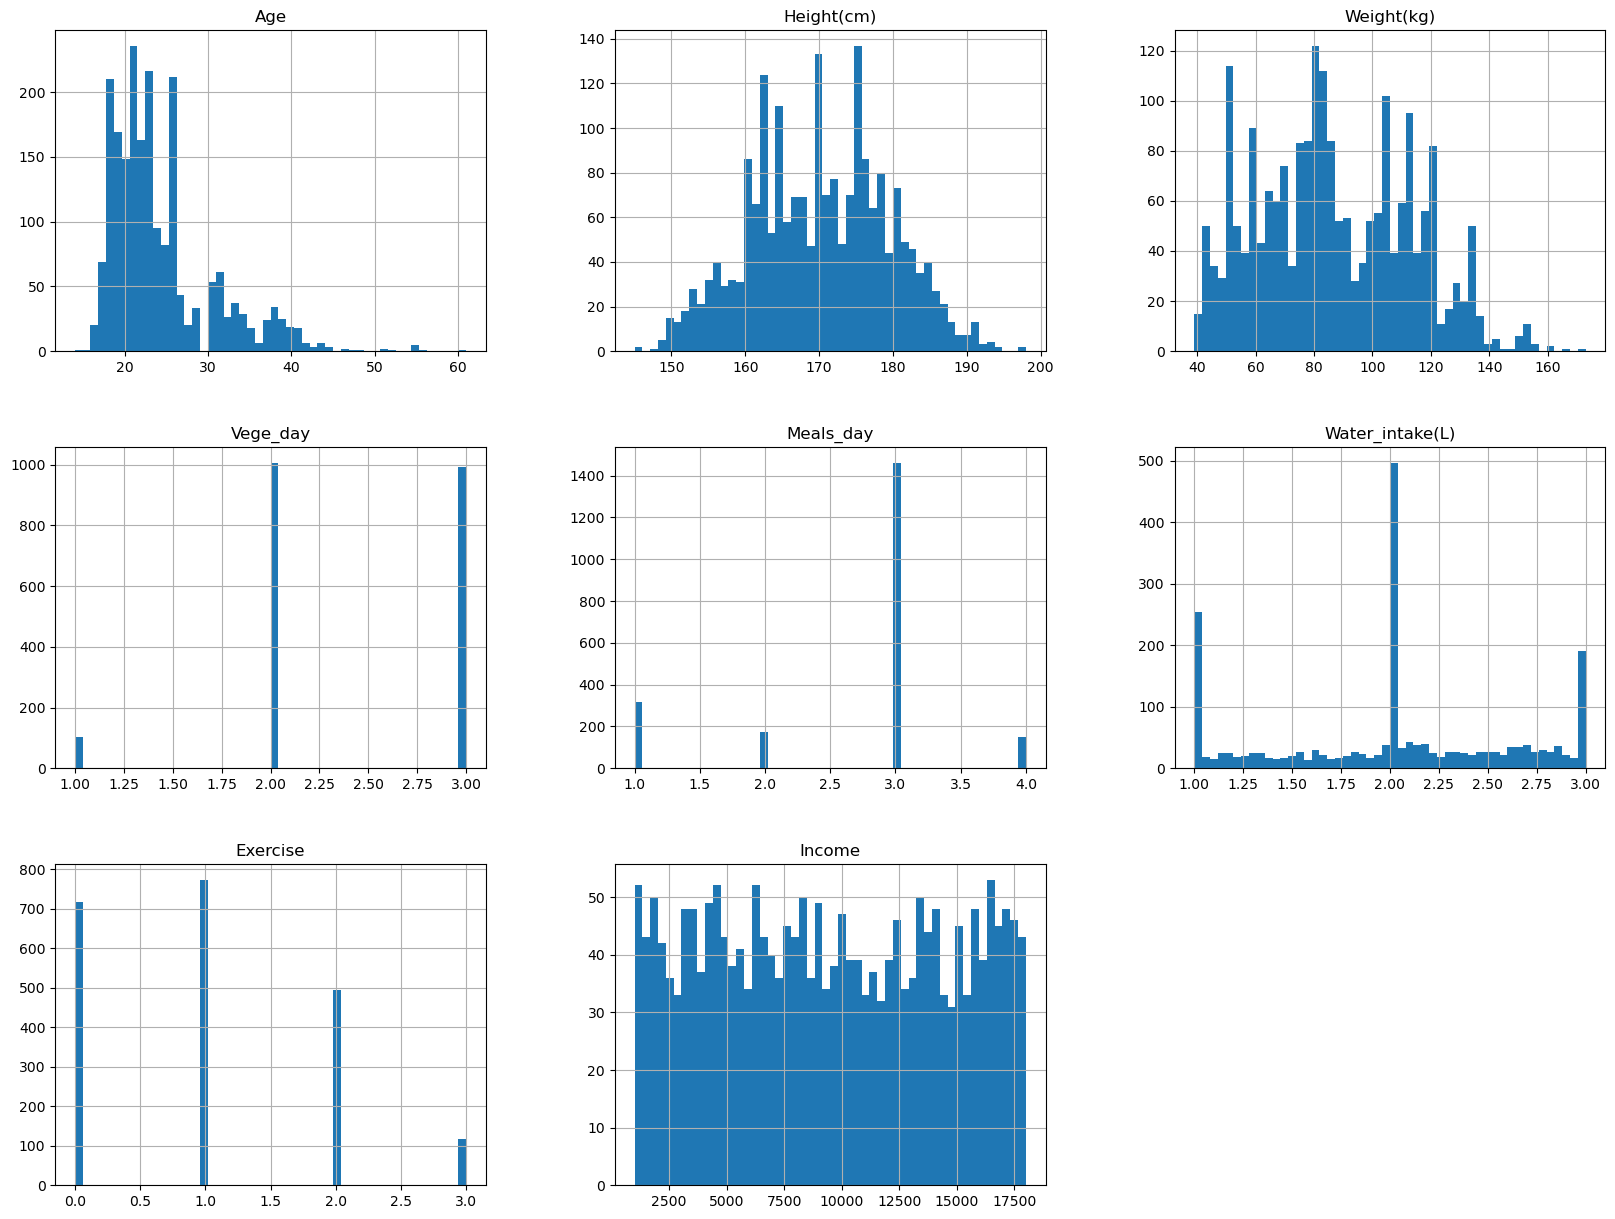

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

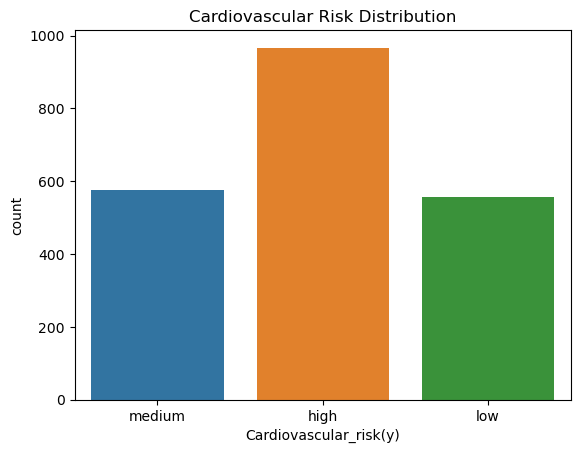

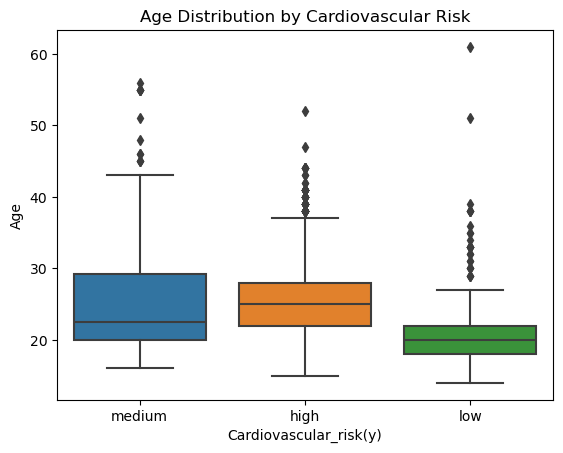

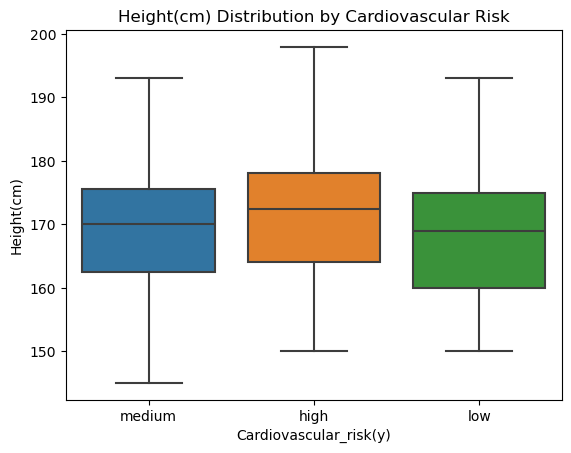

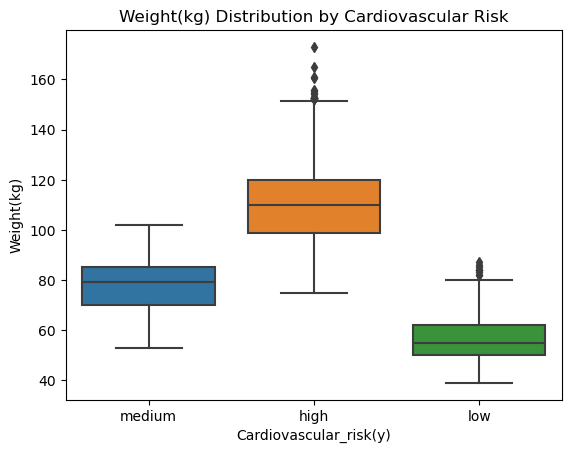

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cardiovascular_risk(y)', data=data)
plt.title('Cardiovascular Risk Distribution')
plt.show()

numerical_features = ['Age', 'Height(cm)', 'Weight(kg)']
for feature in numerical_features:
    sns.boxplot(x='Cardiovascular_risk(y)', y=feature, data=data)
    plt.title(f'{feature} Distribution by Cardiovascular Risk')
    plt.show()

## Data Preprocessing

### Split the dataset to training and testing

#### Seperate Output Vector from input matrix

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

X = data.drop(columns=['Cardiovascular_risk(y)'])
y = data['Cardiovascular_risk(y)']

print ('Shape of original dataset, train:', data.shape)
print ('X: shape=', X.shape, 'type=', type(X))
print ('y: shape=', y.shape, 'type=', type(y))

Shape of original dataset, train: (2100, 18)
X: shape= (2100, 17) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (2100,) type= <class 'pandas.core.series.Series'>


#### Split the input matrix into numerical and categorical sets

In [10]:
#Seperate numerical and categorial
X_num  = X.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
X_cat  = X[['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline']]

print('X_num shape:', X_num.shape)
print('X_cat shape:', X_cat.shape)

X_num shape: (2100, 8)
X_cat shape: (2100, 9)


#### check again if there is missing value need to fill or not

In [11]:
print('Number of missing values for all columns:')
X_num.isnull().sum()

Number of missing values for all columns:


Age                0
Height(cm)         0
Weight(kg)         0
Vege_day           0
Meals_day          0
Water_intake(L)    0
Exercise           0
Income             0
dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler # Standardization is chosen.
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

X_cat_ordinal = X_cat[["Alcohol", "Snack", "TV",]]
X_cat_nominal = X_cat[["Gender", "Family_history", "Junk_food", "Smoking", "Transportation", "Discipline"]]

# Data Conversion
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output = False)
X_cat_nominal = one_hot_encoder.fit_transform(X_cat_nominal)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_cat_ordinal = X_cat_ordinal.apply(lambda item: label_encoder.fit_transform(item), axis = 0)
y = label_encoder.fit_transform(y)

X = np.hstack([X_num, X_cat_nominal, X_cat_ordinal])

#### Split the dataset into training and testing set


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X for Training:", X_train.shape)
print("Shape of X for Testing:", X_test.shape)
print("Shape of Y for Training:", y_train.shape)
print("Shape of Y for Testing:", y_test.shape)

print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

Shape of X for Training: (1680, 26)
Shape of X for Testing: (420, 26)
Shape of Y for Training: (1680,)
Shape of Y for Testing: (420,)
X_train dtype: float64
y_train dtype: int32


## SVM Training and Testing

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', C=1, random_state=42) 
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9833333333333333


#### Model Training and Evaluation

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

print("\nBest Parameters for SVM:", grid_search_svm.best_params_)
print("Best Score for SVM (Mean Cross-Validation Accuracy from Grid Search):", grid_search_svm.best_score_)

cv_results = pd.DataFrame(grid_search_svm.cv_results_)
print("\nCross-Validation Scores for each parameter combination:")
print(cv_results[['param_C', 'param_kernel', 'mean_test_score', 'std_test_score']].to_markdown(index=False, numalign="left", stralign="left"))

best_svm_model = grid_search_svm.best_estimator_

y_pred_svm = best_svm_model.predict(X_test)

print("\nClassification Report - SVM (Test Set):")
print("\nTest Accuracy:")
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))
print("\nConfusion Matrix - SVM (Test Set):")
print(confusion_matrix(y_test, y_pred_svm))

cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation accuracy scores (on the best model): {cv_scores}")
print(f"Mean cross-validation accuracy (on the best model): {np.mean(cv_scores)}")

y_train_pred = best_svm_model.predict(X_train)

print("\nClassification Report - SVM (Training Set):")
print("\nTraning Accuracy:")
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix - SVM (Training Set):")
print(confusion_matrix(y_train, y_train_pred))


Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best Score for SVM (Mean Cross-Validation Accuracy from Grid Search): 0.9845238095238095

Cross-Validation Scores for each parameter combination:
| param_C   | param_kernel   | mean_test_score   | std_test_score   |
|:----------|:---------------|:------------------|:-----------------|
| 0.1       | linear         | 0.960714          | 0.00291606       |
| 0.1       | rbf            | 0.852381          | 0.0271862        |
| 1         | linear         | 0.980357          | 0.00789673       |
| 1         | rbf            | 0.949405          | 0.00776096       |
| 10        | linear         | 0.984524          | 0.00689038       |
| 10        | rbf            | 0.969048          | 0.00894839       |

Classification Report - SVM (Test Set):

Test Accuracy:
0.9880952380952381
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       180
         low       0.98      0.97      0.98       118

## Model Performance

In [17]:
num_misclassifications = np.sum(confusion_matrix(y_test, y_pred_svm)) - np.trace(confusion_matrix(y_test, y_pred_svm))
print(f"Number of Misclassifications(Test Set): {num_misclassifications}")

num_misclassifications = np.sum(confusion_matrix(y_train, y_train_pred)) - np.trace(confusion_matrix(y_train, y_train_pred))
print(f"Number of Misclassifications (Training Set): {num_misclassifications}")

Number of Misclassifications(Test Set): 5
Number of Misclassifications (Training Set): 10
